In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(500)

In [61]:
df = pd.read_csv('../data/mimic-iii-clinical-database-demo-14/PRESCRIPTIONS.csv', dtype=str)
# df.head()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156450 entries, 0 to 4156449
Data columns (total 19 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   ROW_ID             object
 1   SUBJECT_ID         object
 2   HADM_ID            object
 3   ICUSTAY_ID         object
 4   STARTDATE          object
 5   ENDDATE            object
 6   DRUG_TYPE          object
 7   DRUG               object
 8   DRUG_NAME_POE      object
 9   DRUG_NAME_GENERIC  object
 10  FORMULARY_DRUG_CD  object
 11  GSN                object
 12  NDC                object
 13  PROD_STRENGTH      object
 14  DOSE_VAL_RX        object
 15  DOSE_UNIT_RX       object
 16  FORM_VAL_DISP      object
 17  FORM_UNIT_DISP     object
 18  ROUTE              object
dtypes: object(19)
memory usage: 602.5+ MB


In [44]:
df= df.head(10000)

### Drug Type

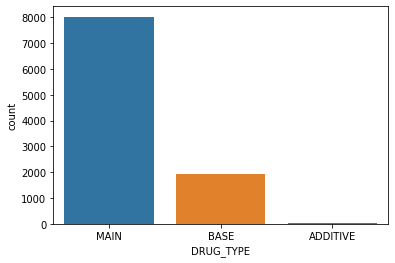

In [45]:
sns.countplot(x='DRUG_TYPE', data=df)

plt.show()

### Top 10 Prescribed Routes

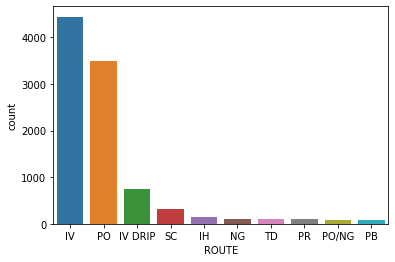

In [46]:
df['ROUTE'].value_counts()

sns.countplot(x='ROUTE',data=df,order=pd.value_counts(df['ROUTE']).iloc[:10].index)
plt.show()

### Top 10 Prescribed Drugs

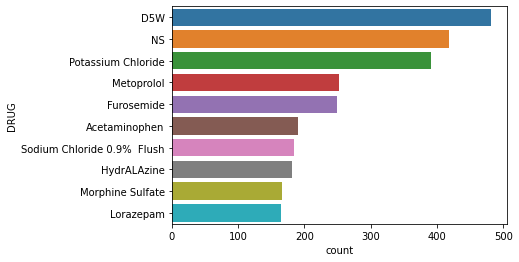

In [47]:
# sns.countplot(route_count)
sns.countplot(y='DRUG',data=df, order=pd.value_counts(df['DRUG']).iloc[:10].index)
plt.show()

### Drugs & NDC codes

In [59]:
df_uniq_drug = df[['DRUG', 'NDC']].groupby('DRUG').count().head(20)
# .sort_values('NDC', ascending=False)

most_presc_drugs = df_uniq_drug.reset_index()

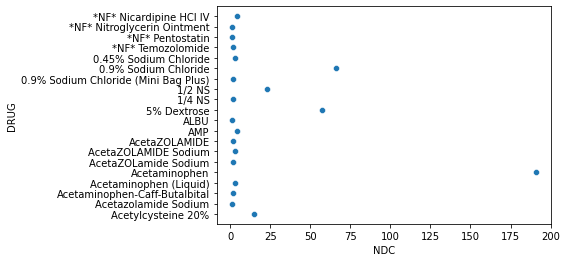

In [60]:
sns.scatterplot(y='DRUG', x='NDC', data=most_presc_drugs)
plt.show()

### Conclusion:

- Most of the dugs in presciprtion corpus has 1-2 NDC codes mapped. 
- There are few others with several NDC codes mapped to them
- It would be good idea
    1. Filter prescription drugs with more than one NDC codes (or)
    2. Pick only one unique NDC code for each DRUG